In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [3]:
df = pd.read_csv("./test1.csv") # feature selection csv

In [4]:
df.sample(5)

,Unnamed: 0,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,...,EMPLOYMENT_YEARS,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_EMAIL,TARGET
117389,128192,1,1,0,2,2,2.0,0,0,0.0,...,1000.665753,0,0,54000.0,7.0,7.0,180000.0,0.0,0,0
96616,105486,1,1,1,2,2,2.0,0,1,1.0,...,0.550685,0,0,135000.0,2.0,2.0,1327500.0,1.0,0,0
207515,226510,1,1,1,2,2,3.0,1,1,3.0,...,16.920548,0,2,495000.0,2.0,2.0,598500.0,0.0,0,0
163472,178477,1,1,1,1,1,2.0,1,0,1.0,...,3.164384,0,0,270000.0,2.0,2.0,1125000.0,0.0,1,0
239072,260939,1,1,1,2,2,2.0,1,0,0.0,...,2.424658,0,0,112500.0,0.0,0.0,229500.0,0.0,0,0


In [5]:
df['TARGET'].value_counts()

0    281818
1     24771
Name: TARGET, dtype: int64

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.head()

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,REG_CITY_NOT_WORK_CITY,...,EMPLOYMENT_YEARS,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_EMAIL,TARGET
0,1,1,1,1,1,2.0,0,1,0.0,0,...,3.254795,0,0,270000.0,1.0,1.0,1129500.0,0.0,0,0
1,1,1,1,2,2,1.0,1,1,0.0,0,...,0.616438,0,0,67500.0,0.0,0.0,135000.0,0.0,0,0
2,1,1,1,2,2,2.0,0,0,1.0,0,...,8.326027,0,0,135000.0,2.0,2.0,297000.0,0.0,0,0
3,1,1,1,2,2,1.0,0,0,0.0,1,...,8.323288,1,0,121500.0,0.0,0.0,513000.0,0.0,0,0
4,1,1,1,2,2,2.0,0,1,1.0,0,...,4.350685,0,0,99000.0,0.0,0.0,454500.0,1.0,0,0


<AxesSubplot: xlabel='TARGET', ylabel='count'>

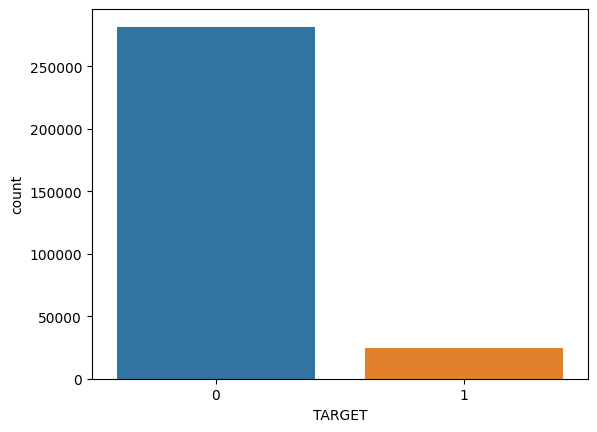

In [8]:
sns.countplot(x='TARGET', data=df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306589 entries, 0 to 306588
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   FLAG_MOBIL                   306589 non-null  int64  
 1   FLAG_CONT_MOBILE             306589 non-null  int64  
 2   FLAG_EMP_PHONE               306589 non-null  int64  
 3   REGION_RATING_CLIENT_W_CITY  306589 non-null  int64  
 4   REGION_RATING_CLIENT         306589 non-null  int64  
 5   CNT_FAM_MEMBERS              306589 non-null  float64
 6   FLAG_OWN_CAR                 306589 non-null  int64  
 7   FLAG_PHONE                   306589 non-null  int64  
 8   AMT_REQ_CREDIT_BUREAU_YEAR   306589 non-null  float64
 9   REG_CITY_NOT_WORK_CITY       306589 non-null  int64  
 10  FLAG_WORK_PHONE              306589 non-null  int64  
 11  DAYS_EMPLOYED                306589 non-null  int64  
 12  EMPLOYMENT_YEARS             306589 non-null  float64
 13 

In [10]:
df = df.select_dtypes(exclude=["object"])

In [11]:
df.isnull().sum()

FLAG_MOBIL                     0
FLAG_CONT_MOBILE               0
FLAG_EMP_PHONE                 0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
CNT_FAM_MEMBERS                0
FLAG_OWN_CAR                   0
FLAG_PHONE                     0
AMT_REQ_CREDIT_BUREAU_YEAR     0
REG_CITY_NOT_WORK_CITY         0
FLAG_WORK_PHONE                0
DAYS_EMPLOYED                  0
EMPLOYMENT_YEARS               0
LIVE_CITY_NOT_WORK_CITY        0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
OBS_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
AMT_GOODS_PRICE                0
AMT_REQ_CREDIT_BUREAU_QRT      0
FLAG_EMAIL                     0
TARGET                         0
dtype: int64

In [12]:
#null values                                                                                                        ### not required for feature selection csv but required for og csv
#df['AMT_GOODS_PRICE'] = df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean())
#df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].mean())
#df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].mean())

In [13]:
df.isnull().sum()

FLAG_MOBIL                     0
FLAG_CONT_MOBILE               0
FLAG_EMP_PHONE                 0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
CNT_FAM_MEMBERS                0
FLAG_OWN_CAR                   0
FLAG_PHONE                     0
AMT_REQ_CREDIT_BUREAU_YEAR     0
REG_CITY_NOT_WORK_CITY         0
FLAG_WORK_PHONE                0
DAYS_EMPLOYED                  0
EMPLOYMENT_YEARS               0
LIVE_CITY_NOT_WORK_CITY        0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
OBS_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
AMT_GOODS_PRICE                0
AMT_REQ_CREDIT_BUREAU_QRT      0
FLAG_EMAIL                     0
TARGET                         0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306589 entries, 0 to 306588
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   FLAG_MOBIL                   306589 non-null  int64  
 1   FLAG_CONT_MOBILE             306589 non-null  int64  
 2   FLAG_EMP_PHONE               306589 non-null  int64  
 3   REGION_RATING_CLIENT_W_CITY  306589 non-null  int64  
 4   REGION_RATING_CLIENT         306589 non-null  int64  
 5   CNT_FAM_MEMBERS              306589 non-null  float64
 6   FLAG_OWN_CAR                 306589 non-null  int64  
 7   FLAG_PHONE                   306589 non-null  int64  
 8   AMT_REQ_CREDIT_BUREAU_YEAR   306589 non-null  float64
 9   REG_CITY_NOT_WORK_CITY       306589 non-null  int64  
 10  FLAG_WORK_PHONE              306589 non-null  int64  
 11  DAYS_EMPLOYED                306589 non-null  int64  
 12  EMPLOYMENT_YEARS             306589 non-null  float64
 13 

In [15]:
# Scaling features of the dataset

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
df1 = df.copy(deep=True)

In [18]:
df1= df1.drop('TARGET', axis=1)

In [19]:
x= df.drop('TARGET',axis=1)
y= df['TARGET']

In [20]:
scaler = StandardScaler()

In [21]:
x = scaler.fit_transform(x)

In [22]:
df_scaled = pd.DataFrame(scaler.fit_transform(x), columns=df1.columns, index= df1.index)

In [23]:
df_scaled.head() # scaled dataframe

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,REG_CITY_NOT_WORK_CITY,...,DAYS_EMPLOYED,EMPLOYMENT_YEARS,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_EMAIL
0,0.0,0.042739,0.469303,-2.055354,-2.071132,-0.167294,-0.717270,1.601416,-1.007765,-0.547283,...,-0.477758,-0.477758,-0.467807,-0.577332,1.203120,-0.174499,-0.168947,1.611073,-0.308520,-0.244799
1,0.0,0.042739,0.469303,-0.064274,-0.104664,-1.265612,1.394176,1.601416,-1.007765,-0.547283,...,-0.484658,-0.484658,-0.467807,-0.577332,-1.146966,-0.591331,-0.589493,-1.093878,-0.308520,-0.244799
2,0.0,0.042739,0.469303,-0.064274,-0.104664,-0.167294,-0.717270,-0.624447,-0.441531,-0.547283,...,-0.464495,-0.464495,-0.467807,-0.577332,-0.363604,0.242333,0.251599,-0.653252,-0.308520,-0.244799
3,0.0,0.042739,0.469303,-0.064274,-0.104664,-1.265612,-0.717270,-0.624447,-1.007765,1.827208,...,-0.464502,-0.464502,2.137635,-0.577332,-0.520276,-0.591331,-0.589493,-0.065752,-0.308520,-0.244799
4,0.0,0.042739,0.469303,-0.064274,-0.104664,-0.167294,-0.717270,1.601416,-0.441531,-0.547283,...,-0.474892,-0.474892,-0.467807,-0.577332,-0.781397,-0.591331,-0.589493,-0.224867,1.034405,-0.244799


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x= df_scaled # getting x feature set from scaled data frame
# y has already been taken in line 327

In [26]:
df_scaled.isna().sum()

FLAG_MOBIL                     0
FLAG_CONT_MOBILE               0
FLAG_EMP_PHONE                 0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
CNT_FAM_MEMBERS                0
FLAG_OWN_CAR                   0
FLAG_PHONE                     0
AMT_REQ_CREDIT_BUREAU_YEAR     0
REG_CITY_NOT_WORK_CITY         0
FLAG_WORK_PHONE                0
DAYS_EMPLOYED                  0
EMPLOYMENT_YEARS               0
LIVE_CITY_NOT_WORK_CITY        0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
OBS_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
AMT_GOODS_PRICE                0
AMT_REQ_CREDIT_BUREAU_QRT      0
FLAG_EMAIL                     0
dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [28]:
#from imblearn.over_sampling import SMOTE  # used for imbalanced dataset 

In [29]:
#sm = SMOTE(random_state = 10000)
#X_res, y_res = sm.fit_resample(X_train,y_train)

##Training model

1. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model1 = LogisticRegression(solver='liblinear', n_jobs=-1, random_state=0)

In [32]:
model1.fit(X_train, y_train)

d:\VS Code\ML\project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  warnings.warn(


LogisticRegression(n_jobs=-1, random_state=0, solver='liblinear')

In [33]:
#predcit

y_pred1 = model1.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
#scores
print('train score', model1.score(X_train, y_train))
print('accuracy', accuracy_score(y_test, y_pred1))
print('precision score', precision_score(y_test, y_pred1))
print('recall', recall_score(y_test, y_pred1))
print('f1 score', f1_score(y_test, y_pred1))

train score 0.9193178158037436
accuracy 0.9185883427378584
precision score 0.0
recall 0.0
f1 score 0.0


In [35]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[56326,     4],
       [ 4988,     0]], dtype=int64)

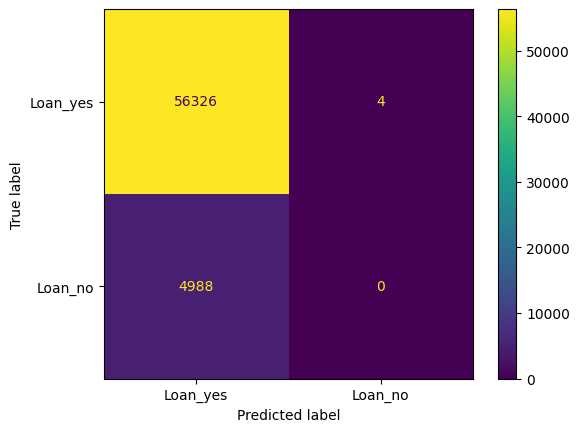

In [36]:
display = ConfusionMatrixDisplay(cm, display_labels = ['Loan_yes', 'Loan_no'])
display.plot()

In [37]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56330
           1       0.00      0.00      0.00      4988

    accuracy                           0.92     61318
   macro avg       0.46      0.50      0.48     61318
weighted avg       0.84      0.92      0.88     61318



2. Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model2 = RandomForestClassifier(n_estimators = 200)
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [40]:
y_pred2 = model2.predict(X_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
#scores
print('train score', model2.score(X_train, y_train))
print('accuracy', accuracy_score(y_test, y_pred2))
print('precision score', precision_score(y_test, y_pred2))
print('recall', recall_score(y_test, y_pred2))
print('f1 score', f1_score(y_test, y_pred2))

train score 0.9984099220861822
accuracy 0.9172021266186112
precision score 0.11304347826086956
recall 0.0026062550120288693
f1 score 0.005095042132079169


In [42]:
cm = confusion_matrix(y_test, y_pred2)
cm

array([[56228,   102],
       [ 4975,    13]], dtype=int64)

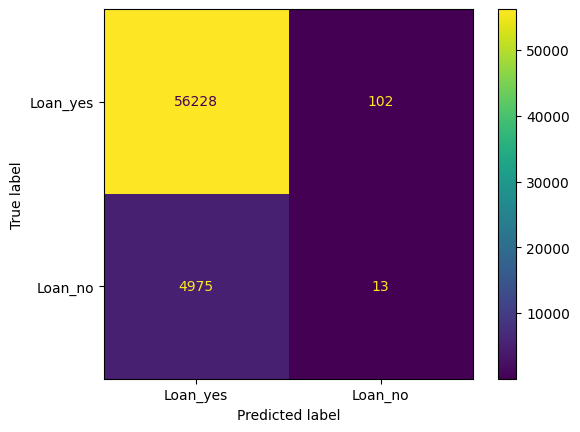

In [43]:
display = ConfusionMatrixDisplay(cm, display_labels = ['Loan_yes', 'Loan_no'])
display.plot()

In [44]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56330
           1       0.11      0.00      0.01      4988

    accuracy                           0.92     61318
   macro avg       0.52      0.50      0.48     61318
weighted avg       0.85      0.92      0.88     61318



3. naive bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train, y_train)

GaussianNB()

In [46]:
y_pred3 = model3.predict(X_test)

In [47]:
#scores
print('train score', model3.score(X_train, y_train))
print('accuracy', accuracy_score(y_test, y_pred3))
print('precision score', precision_score(y_test, y_pred3))
print('recall', recall_score(y_test, y_pred3))
print('f1 score', f1_score(y_test, y_pred3))

train score 0.8870025400475392
accuracy 0.8857268664992335
precision score 0.14290767598160595
recall 0.0809943865276664
f1 score 0.10339091490722968


In [48]:
cm = confusion_matrix(y_test, y_pred3)
cm

array([[53907,  2423],
       [ 4584,   404]], dtype=int64)

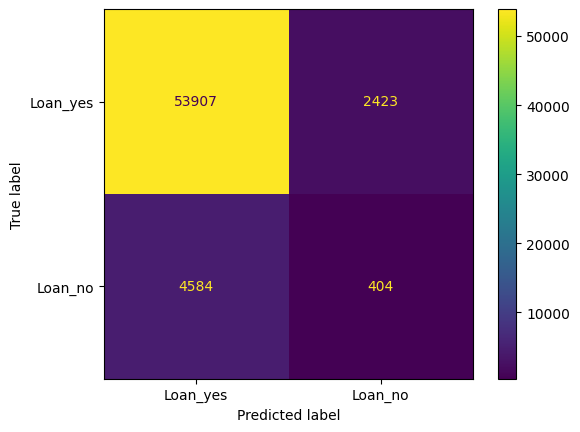

In [49]:
display = ConfusionMatrixDisplay(cm, display_labels = ['Loan_yes', 'Loan_no'])
display.plot()

In [50]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     56330
           1       0.14      0.08      0.10      4988

    accuracy                           0.89     61318
   macro avg       0.53      0.52      0.52     61318
weighted avg       0.86      0.89      0.87     61318

